# mfeat

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import dataset
### 1. mfeat-mor-left

In [2]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-mor-left')

Reading each data file line by line

In [3]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [4]:
mor_table = pd.DataFrame(columns=['class','mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])

In [5]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=['mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])
    mor_table = mor_table.append(temp_df, ignore_index = True)

In [6]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    mor_table.iloc[a:b,[0]] = x/160 - 1

In [7]:
mor_table['class'].value_counts()

9.0    160
8.0    160
7.0    160
6.0    160
5.0    160
4.0    160
3.0    160
2.0    160
1.0    160
0.0    160
Name: class, dtype: int64

In [8]:
mor_table = mor_table.astype({
    'class' : 'int8',    # category
    })

In [9]:
mor_table.head()

,class,mor1,mor2,mor3,mor4,mor5,mor6
0,0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,0,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,0,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,0,1.0,0.0,0.0,127.262861,1.329637,1647.720235
4,0,1.0,0.0,0.0,138.442861,1.379906,1918.750472


### 2. mfeat-zer-left

In [10]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-zer-left')

Reading each data file line by line

In [11]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [12]:
cols = []
for no in range(1, 48):
    cols.append('zer'+str(no))

In [13]:
zer_table = pd.DataFrame(columns=cols)

In [14]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    zer_table = zer_table.append(temp_df, ignore_index = True)

In [15]:
zer_table['class'] = pd.Series(0)

In [16]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    zer_table.iloc[a:b,[47]] = x/160 - 1

In [17]:
zer_table = zer_table.astype({'class' : 'int8'})

In [18]:
zer_table['class'].value_counts()

9    160
8    160
7    160
6    160
5    160
4    160
3    160
2    160
1    160
0    160
Name: class, dtype: int64

### 3. mfeat-zer-left

In [19]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-pix-left')

Reading each data file line by line

In [20]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [21]:
cols = []
for no in range(1, 241):
    cols.append('zer'+str(no))

In [22]:
pix_table = pd.DataFrame(columns=cols)

In [23]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    pix_table = pix_table.append(temp_df, ignore_index = True)

In [24]:
pix_table['class'] = pd.Series(0)

In [25]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    pix_table.iloc[a:b,[240]] = x/160 - 1

In [26]:
pix_table = pix_table.astype('int8')

In [27]:
pix_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 241 entries, zer1 to class
dtypes: int8(241)
memory usage: 376.7 KB


#### Note
3 tables available: `pix_table`, `zer_table`, `mor_table`

They can be connected on `class` column

## Data visualization

- create 2D numpy array for image

In [28]:
def get_image(num):
    if not(num >= 0 and num < 1600):
        return None
    x = 0
    img = np.zeros((16, 15))
    i = 0 
    while x < 240:
        a = x
        x += 15
        b = x   
        img[i] = pix_table.iloc[num,a:b].values
        i += 1
    return img

In [29]:
sample = get_image(1599)

In [30]:
sample

array([[0., 0., 1., 5., 6., 6., 6., 6., 6., 6., 6., 4., 3., 0., 0.],
       [0., 3., 6., 6., 6., 5., 2., 4., 6., 6., 6., 6., 6., 5., 0.],
       [3., 6., 6., 6., 3., 0., 0., 0., 0., 4., 6., 6., 6., 6., 0.],
       [2., 6., 6., 6., 0., 0., 0., 0., 0., 3., 6., 6., 6., 6., 1.],
       [0., 6., 6., 6., 0., 0., 0., 0., 0., 4., 6., 6., 6., 6., 2.],
       [0., 2., 6., 6., 5., 4., 4., 4., 5., 6., 6., 6., 6., 6., 0.],
       [0., 0., 1., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 2., 0.],
       [0., 0., 0., 0., 2., 2., 2., 2., 5., 6., 6., 6., 6., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 6., 6., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 6., 6., 5., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 6., 6., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 6., 6., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 6., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 6.

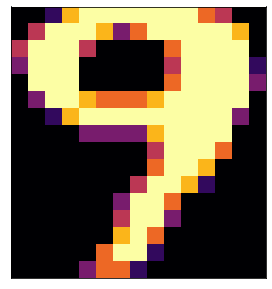

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.imshow(sample)


## Normalize data

### mor table

In [45]:
from sklearn import preprocessing

# don't scale 'class'
cols = mor_table.columns[1:]
df = pd.DataFrame(mor_table.iloc[:, 1:])
d

mor_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = mor_min_max_scaler.fit_transform(df)
mor_table_norm = pd.DataFrame(np_scaled, columns = cols)
mor_table_norm['class'] = mor_table['class']
mor_table_norm

,mor1,mor2,mor3,mor4,mor5,mor6
0,0.5,0.000000,0.0,0.158136,0.119067,0.011200
1,0.5,0.000000,0.0,0.103005,0.112746,0.010525
2,0.5,0.000000,0.0,0.141174,0.124250,0.008024
3,0.5,0.000000,0.0,0.107620,0.131742,0.012905
4,0.5,0.000000,0.0,0.203538,0.167250,0.029705
...,...,...,...,...,...,...
1595,0.5,0.166667,0.2,0.367028,0.362127,0.240908
1596,0.5,0.166667,0.2,0.323324,0.337088,0.235778
1597,0.5,0.166667,0.2,0.171194,0.281739,0.144256
1598,0.5,0.166667,0.2,0.242008,0.200078,0.166048


### zer table

In [55]:
# don't scale 'class'
cols = zer_table.columns[:47]
df = pd.DataFrame(zer_table.iloc[:, :47])

zer_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = zer_min_max_scaler.fit_transform(df)
zer_table_norm = pd.DataFrame(np_scaled, columns = cols)
# insert class
zer_table_norm['class'] = zer_table['class']
zer_table_norm

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,...,zer38,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47
0,0.020047,0.102600,0.215032,0.370950,0.597279,0.870073,0.445390,0.190564,0.193832,0.116014,...,0.133284,0.209500,0.027292,0.043276,0.378609,0.353663,0.241635,0.088271,0.397238,0.476218
1,0.074991,0.145649,0.145805,0.202345,0.289732,0.745687,0.547263,0.049339,0.024287,0.118499,...,0.204521,0.219565,0.237645,0.260938,0.407859,0.437710,0.201042,0.200728,0.387061,0.430761
2,0.083922,0.153130,0.113477,0.148771,0.180273,0.716714,0.841970,0.062231,0.066218,0.117717,...,0.114006,0.118782,0.097273,0.309790,0.386920,0.505695,0.107736,0.117085,0.361180,0.499711
3,0.029798,0.074365,0.118557,0.176910,0.159124,0.816169,0.514863,0.069802,0.080012,0.100110,...,0.048324,0.050604,0.097788,0.357556,0.457537,0.363829,0.037308,0.105152,0.446755,0.373107
4,0.135733,0.115134,0.425147,0.595234,0.520194,0.988880,0.143917,0.073899,0.165558,0.154022,...,0.058062,0.170759,0.016150,0.072598,0.481330,0.267238,0.175287,0.045339,0.518281,0.414735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.035505,0.003611,0.054880,0.089915,0.473749,0.645896,0.179916,0.039868,0.007808,0.063798,...,0.180094,0.230182,0.788217,0.248665,0.363406,0.463847,0.214790,0.697028,0.346284,0.393540
1596,0.049434,0.043758,0.112414,0.171519,0.213045,0.383600,0.230613,0.080567,0.071172,0.122083,...,0.175329,0.046915,0.770640,0.286025,0.542446,0.397996,0.026525,0.737946,0.498316,0.351601
1597,0.046596,0.096663,0.136127,0.229589,0.240417,0.675636,0.165736,0.077938,0.137023,0.223603,...,0.204692,0.142520,0.418486,0.243431,0.279128,0.407984,0.110649,0.461751,0.250253,0.237729
1598,0.018056,0.026422,0.013208,0.045131,0.277170,0.735883,0.081851,0.051258,0.087284,0.172836,...,0.267828,0.437502,0.599872,0.132573,0.344875,0.615042,0.407019,0.577338,0.311001,0.546928


### pix table

In [59]:
pix_table.columns[:240]

Index(['zer1', 'zer2', 'zer3', 'zer4', 'zer5', 'zer6', 'zer7', 'zer8', 'zer9',
       'zer10',
       ...
       'zer231', 'zer232', 'zer233', 'zer234', 'zer235', 'zer236', 'zer237',
       'zer238', 'zer239', 'zer240'],
      dtype='object', length=240)

In [60]:
# don't scale 'class'
cols = pix_table.columns[:240]
df = pd.DataFrame(pix_table.iloc[:, :240])

pix_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = pix_min_max_scaler.fit_transform(df)
pix_table_norm = pd.DataFrame(np_scaled, columns = cols)

pix_table_norm['class'] = pix_table['class']

pix_table_norm

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,...,zer231,zer232,zer233,zer234,zer235,zer236,zer237,zer238,zer239,zer240
0,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,...,1.00,1.00,1.00,1.00,1.00,0.75,0.0,0.00,0.00,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.500000,0.666667,0.666667,...,0.50,1.00,1.00,1.00,1.00,0.50,0.0,0.00,0.00,0.0
2,0.0,0.0,0.166667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.500000,...,0.25,0.75,1.00,1.00,1.00,1.00,1.0,0.50,0.25,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,1.000000,1.000000,...,1.00,1.00,1.00,1.00,0.75,0.25,0.0,0.00,0.00,0.0
4,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,0.833333,0.666667,0.833333,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.75,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.000000,0.166667,0.500000,0.666667,0.833333,1.000000,0.666667,0.666667,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.00,0.00,0.0
1596,0.0,0.0,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.00,1.00,0.75,0.00,0.00,0.0,0.00,0.00,0.0
1597,0.0,0.0,0.000000,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,...,0.00,0.50,1.00,1.00,1.00,0.25,0.0,0.00,0.00,0.0
1598,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.666667,0.833333,...,0.75,1.00,1.00,1.00,1.00,0.50,0.0,0.00,0.00,0.0


### Model evaluation 